In [1]:
# just in case pip will pompt for upgrade
!pip install  --quiet --upgrade pip

In [2]:
# download data to local

import os

def detect_environment():
    """Detects the environment: Kaggle, Google Colab, or Local."""
    if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
        return "Kaggle"
    elif "COLAB_GPU" in os.environ:
        return "Google Colab"
    else:
        return "Local"

def create_folder_if_not_exists(path):
    """Creates a folder if it does not already exist."""
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Folder created at: {path}")
    else:
        print(f"Folder already exists at: {path}")

def setup_kaggle_credentials():
    """Ensures Kaggle API credentials are available."""
    if detect_environment() == "Google Colab":
      from google.colab import userdata
      os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
      os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
    elif detect_environment() == "Local":
      kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
      if not os.path.exists(kaggle_json_path):
        # Prompt user to upload `kaggle.json`
        print("Please upload your `kaggle.json` file.")
        from google.colab import files
        uploaded = files.upload()
        with open(kaggle_json_path, "wb") as f:
            f.write(uploaded['kaggle.json'])
      os.chmod(kaggle_json_path, 0o600)  # Set correct permissions for the file

def download_kaggle_resource(input_path, resource_name):
    """
    Downloads a dataset or notebook output from Kaggle using the resource name.
    Automatically unzips if needed and logs useful diagnostic information.
    """
    from kaggle.api.kaggle_api_extended import KaggleApi
    import os

    setup_kaggle_credentials()

    # Initialize Kaggle API
    api = KaggleApi()
    api.authenticate()

    try:
        # Attempt to download as a dataset
        print(f"Attempting to download dataset: {resource_name}")
        api.dataset_download_files(resource_name, path=input_path, unzip=True)
        print(f"Dataset downloaded and extracted to {input_path}")
    except Exception as dataset_error:
        print(f"Dataset not found or inaccessible: {dataset_error}. Attempting as notebook output.")
        try:
            # Attempt to download as notebook output
            print(f"Attempting to download notebook output: {resource_name}")
            api.kernel_output(resource_name, path=input_path, unzip=True)
            print(f"Notebook output downloaded and extracted to {input_path}")
        except Exception as notebook_error:
            print(f"Failed to download resource: {resource_name}.")
            print(f"Dataset error: {dataset_error}")
            print(f"Notebook output error: {notebook_error}")
            print("Please verify the resource name, access permissions, and your Kaggle API credentials.")

In [3]:
!pip install --quiet kaggle
resource_name = "arshkon/linkedin-job-postings"

In [4]:
# Step 1: Detect environment
environment = detect_environment()
print(f"Environment detected: {environment}")

# Step 2: Create input folder
if environment == "Kaggle":
    input_path = "/kaggle/input"
elif environment == "Google Colab":
    input_path = "/content/input"
elif environment == "Local":
    input_path = "./input"
else:
    raise ValueError("Unknown environment detected!")

create_folder_if_not_exists(input_path)
print(f"Input folder path: {input_path}")

# Step 3: Create output folder
if environment == "Kaggle":
    output_path = "/kaggle/working/output"
elif environment == "Google Colab":
    output_path = "/content/output"
elif environment == "Local":
    output_path = "./output"
else:
    raise ValueError("Unknown environment detected!")

create_folder_if_not_exists(output_path)
print(f"Output folder path: {output_path}")

# Step 4: Download dataset or notebook output
if environment != "Kaggle":
    pass
    # resource_name = input("Enter the Kaggle dataset name or notebook name to download: ")
    download_kaggle_resource(input_path, resource_name)

# initialize the data prefix
if environment == "Kaggle":
    dataprefix = input_path + "/" + resource_name.split("/")[1]
elif environment == "Google Colab":
    dataprefix = input_path
elif environment == "Local":
    dataprefix = input_path
# mount cloud drive if necessary
if environment == "Google Colab":
  from google.colab import drive
  drive.mount('/content/drive')

Environment detected: Local
Folder already exists at: ./input
Input folder path: ./input
Folder already exists at: ./output
Output folder path: ./output
Attempting to download dataset: arshkon/linkedin-job-postings
Dataset URL: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
Dataset downloaded and extracted to ./input


In [5]:
!pip install --quiet pandas

In [6]:
import pandas as pd
# Load the Job Postings CSV file into a Pandas DataFrame
postings_df = pd.read_csv(f"{dataprefix}/postings.csv")
# Print number of rows and columns
print('jd shape=',postings_df.shape)

# Display the first few rows of the dataset to understand its structure
postings_df.head()

jd shape= (123849, 31)


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [7]:
# Load the Job Postings CSV file into a Pandas DataFrame
jimap_df = pd.read_csv(f"{dataprefix}/jobs/job_industries.csv")
ins_df = pd.read_csv(f"{dataprefix}/mappings/industries.csv")

# print(ins_df['industry_name'].tolist())

# print the industries related to IT/software derived from chat gpt
IT_IND_KEYWORDS = [
    "Software",
    "IT Services",
    "IT System",
    "Computer",
    "Data Security Software Products",
    "Blockchain",
    "Internet",
    "Social Networking",
    "Business Intelligence",
    "E-Learning",
]
IT_IND_STOPWORDS = [
    "Publishing",
    "News",
    "Hardware",
    "Equipment"
]
# print('|'.join(IT_IND_KEYWORDS))
ins_include = ins_df['industry_name'].str.contains('|'.join(IT_IND_KEYWORDS), na=False)
ins_exlcude = ins_df['industry_name'].str.contains('|'.join(IT_IND_STOPWORDS),na=False )

ins_it = ins_df[ins_include]
ins_it = ins_it[~ins_exlcude]

print(ins_it)

     industry_id                            industry_name
2              4                     Software Development
3              5             Computer Networking Products
4              6     Technology, Information and Internet
22            24  Computers and Electronics Manufacturing
93            96            IT Services and IT Consulting
106          109                           Computer Games
115          118            Computer and Network Security
129          132                     E-Learning Providers
226         1285           Internet Marketplace Platforms
268         1855                IT System Design Services
342         3101      Desktop Computing Software Products
343         3102    IT System Custom Software Development
344         3103     IT System Operations and Maintenance
345         3104      IT System Installation and Disposal
346         3105           IT System Training and Support
347         3106                  IT System Data Services
348         31

/var/folders/bj/spr6xdy950jf8sj2svjhs0vh0000gn/T/ipykernel_4178/23122396.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ins_it = ins_it[~ins_exlcude]


In [8]:
df_itpos = pd.merge(pd.merge(ins_it,jimap_df,on='industry_id'), postings_df, on='job_id')
print(df_itpos.shape)
df_itpos.head()

(18675, 33)


,industry_id,industry_name,job_id,company_name,title,description,max_salary,pay_period,location,company_id,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,4,Software Development,3884916106,"Direct Sales Recruiting, LLC",Sales Manager - Public Relations & Investor Re...,Sales Manager - Public Relations & Investor Re...,NaN,NaN,New York City Metropolitan Area,766849.0,...,NaN,1.712346e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
1,4,Software Development,3884915161,"Direct Sales Recruiting, LLC",Business Development Rep - Digital Media - Chi...,Business Development Rep - Digital Media \nOur...,80000.0,YEARLY,Greater Chicago Area,766849.0,...,NaN,1.712346e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,65000.0,NaN,NaN
2,4,Software Development,3887466954,hackajob,Cloud Engineer,hackajob transforms your job search into a per...,160000.0,YEARLY,"Suitland, MD",5396873.0,...,NaN,1.712346e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,135000.0,20746.0,24033.0
3,4,Software Development,3884432470,Renewed Vision,Windows Software Engineer,The Renewed Vision Windows Software Engineer w...,NaN,NaN,United States,8913985.0,...,NaN,1.712346e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
4,4,Software Development,3884429682,Diverse Lynx,Cyber security /Report Developer ( W2 Role),Role: Security Analyst/Report Developer (exper...,NaN,NaN,United States,90396.0,...,NaN,1.712347e+12,NaN,0,CONTRACT,NaN,NaN,NaN,NaN,NaN


In [9]:
# print non-empty skills desc
skill_set = df_itpos[pd.isna(df_itpos['skills_desc'])==False]['skills_desc']
print(skill_set)
#TODO: strip out skill sets 

894      \n\nMust Have: Minimum Requirements  Requires ...
938                                            PI239440414
950      \n\nMust Have: Minimum Requirements \n\nTo be ...
2647                                       Financenetsuite
2877                    Sales enablementchannel enablement
                               ...                        
16443    Sap Solution Manager,Sap Master Data,Sap Syste...
16449       Healthcare,Project Management,Project Delivery
16451                                   HRP,SHAREPOINT,SDS
16452                          Sap Fico,Sap S4 Hana,Sap Bw
17934    CRMEdTechOutreachSFDCSaaS EdTechSales experien...
Name: skills_desc, Length: 261, dtype: object


In [10]:
# stratified sample of it positions
# postings_sample_df = df_itpos.sample(1000)
postings_sample_df = df_itpos.groupby('industry_id', group_keys=False)\
    .apply(lambda x: x.sample(min(len(x), 10)))

# list the columns of data
print(postings_sample_df.shape)
# check completeness of each column 
print(postings_sample_df.count())

(203, 33)
industry_id                   203
industry_name                 203
job_id                        203
company_name                  200
title                         203
description                   203
max_salary                     72
pay_period                     77
location                      203
company_id                    200
views                         199
med_salary                      5
min_salary                     72
formatted_work_type           203
applies                        83
original_listed_time          203
remote_allowed                 97
job_posting_url               203
application_url                94
application_type              203
expiry                        203
closed_time                     0
formatted_experience_level    141
skills_desc                     0
listed_time                   203
posting_domain                 64
sponsored                     203
work_type                     203
currency                       77
comp

/var/folders/bj/spr6xdy950jf8sj2svjhs0vh0000gn/T/ipykernel_4178/3155268936.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), 10)))


In [11]:
postings_sample_df.head(20)

,industry_id,industry_name,job_id,company_name,title,description,max_salary,pay_period,location,company_id,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
4829,4,Software Development,3904725745,Amazon,"Senior Operations Engineer, Global Transportat...",Description\n\nThe North American Network Desi...,NaN,NaN,"Bellevue, WA",1586.0,...,NaN,1.713572e+12,www.amazon.jobs,0,FULL_TIME,NaN,NaN,NaN,98004.0,53033.0
4725,4,Software Development,3906257350,monday.com,Solution Engineer - CRM,Description\n\nOur sales team is growing and w...,160000.0,YEARLY,"New York, United States",2525169.0,...,NaN,1.713568e+12,monday.com,0,FULL_TIME,USD,BASE_SALARY,140000.0,NaN,NaN
4423,4,Software Development,3902834376,"Datasoft Technologies, Inc.",Informatica Cloud Migration Lead-24-00289,Informatica Cloud Migration LeadOnsiteAbout th...,NaN,NaN,"Columbus, OH",152765.0,...,NaN,1.713554e+12,NaN,0,CONTRACT,NaN,NaN,NaN,43085.0,39049.0
3647,4,Software Development,3905369706,FloQast,Full Stack Senior Software Engineer - Close,We’re looking for a Senior Software Engineer t...,210000.0,YEARLY,United States,3059072.0,...,NaN,1.713496e+12,jobs.lever.co,0,FULL_TIME,USD,BASE_SALARY,180000.0,NaN,NaN
2747,4,Software Development,3901393661,DataAnnotation,AI Content Writer,DataAnnotation is committed to creating qualit...,NaN,NaN,Miami-Fort Lauderdale Area,96139831.0,...,NaN,1.713464e+12,NaN,0,CONTRACT,NaN,NaN,NaN,NaN,NaN
2610,4,Software Development,3905205603,Cisco,Public Relations Manager - Networking,What You'll Do\n\nCisco helps to connect every...,153400.0,YEARLY,"Chicago, IL",1063.0,...,NaN,1.713460e+12,jobs.cisco.com,0,FULL_TIME,USD,BASE_SALARY,119550.0,60601.0,17031.0
292,4,Software Development,3884811061,LemaTech LLC,Software Engineer,Company DescriptionThe Web Developers | LemaTe...,NaN,NaN,United States,86637452.0,...,NaN,1.712367e+12,NaN,0,PART_TIME,NaN,NaN,NaN,NaN,NaN
3305,4,Software Development,3905311309,symplr,Technical Project Manager,Overview\n\nThe Technical Project Manager will...,100000.0,YEARLY,United States,5400751.0,...,NaN,1.713477e+12,careers-symplr.icims.com,0,FULL_TIME,USD,BASE_SALARY,95000.0,NaN,NaN
2483,4,Software Development,3901389262,DataAnnotation,Data Analyst,DataAnnotation is committed to creating qualit...,NaN,NaN,Greater Boston,96139831.0,...,NaN,1.713460e+12,NaN,0,CONTRACT,NaN,NaN,NaN,NaN,NaN
2968,4,Software Development,3901939473,DataAnnotation,Frontend Developer,DataAnnotation is committed to creating qualit...,NaN,NaN,Greater Phoenix Area,96139831.0,...,NaN,1.713469e+12,NaN,0,CONTRACT,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Analyze the key elements from sample postings, such as responsibilities, qualifications
print("containing responsibilities:",str(postings_sample_df['description'].str.contains('responsibilities|responsibility').value_counts()[True]))
print("containing qualification:",postings_sample_df['description'].str.contains('qualification|qualifications').value_counts()[True])
print("containing company:",postings_sample_df['description'].str.contains('company').value_counts()[True])

containing responsibilities: 42
containing qualification: 31
containing keywords: 87


In [13]:
JOB_DETAILS_EXTRACTOR = """
<task>
Identify the key details from a job description and company overview to create a structured JSON output. Focus on extracting the most crucial and concise information that would be most relevant for tailoring a resume to this specific job.
</task>

<job_description>
{job_description}
</job_description>

Note: The "job_duties_and_responsibilities", and "required_qualifications" sections are particularly important for resume tailoring. Ensure these are as comprehensive and accurate as possible.

{format_instructions}
"""

In [14]:
!pip install --quiet --upgrade pydantic
!pip install --quiet langchain_core langchain_ollama
!pip install --quiet langchain_google_genai

In [15]:
from typing import List,Optional
from pydantic import BaseModel, Field

class JobDetails(BaseModel):
    job_title: str = Field(description="The specific role, its level, and scope within the organization.")
    # job_purpose: Optional[str] = Field(description="A high-level overview of the role and why it exists in the organization.")
    # keywords: Optional[List[str]] = Field(description="Key expertise, skills, and requirements the job demands.")
    job_responsibilities: List[str] = Field(description="Focus on essential functions, their frequency and importance, level of decision-making, areas of accountability, and any supervisory responsibilities.")
    required_qualifications: List[str] = Field(description="Including minimum experience, specific knowledge, skills, abilities, and any required licenses or certifications.")
    preferred_qualifications: Optional[List[str]] = Field(description="Additional \"nice-to-have\" qualifications that could set a candidate apart.")
    eduation: Optional[str] = Field(description="The minimum education level required for the role.")
    company_name: Optional[str] = Field(description="The name of the hiring organization.")
    company_details: Optional[str] = Field(description="Overview, mission, values, or way of working that could be relevant for tailoring a resume or cover letter.")

# compose the 
SEPERATOR = " \n "
postings_sample_df['jd_to_extract'] = "Job Title: " + postings_sample_df['title'] + SEPERATOR  \
                                + "Company Name: " + postings_sample_df['company_name'] + SEPERATOR \
                                + postings_sample_df['description']
postings_sample_df[['title','industry_name','company_name','jd_to_extract']][:10]

,title,industry_name,company_name,jd_to_extract
4829,"Senior Operations Engineer, Global Transportat...",Software Development,Amazon,"Job Title: Senior Operations Engineer, Global ..."
4725,Solution Engineer - CRM,Software Development,monday.com,Job Title: Solution Engineer - CRM \n Company ...
4423,Informatica Cloud Migration Lead-24-00289,Software Development,"Datasoft Technologies, Inc.",Job Title: Informatica Cloud Migration Lead-2...
3647,Full Stack Senior Software Engineer - Close,Software Development,FloQast,Job Title: Full Stack Senior Software Engineer...
2747,AI Content Writer,Software Development,DataAnnotation,Job Title: AI Content Writer \n Company Name: ...
2610,Public Relations Manager - Networking,Software Development,Cisco,Job Title: Public Relations Manager - Networki...
292,Software Engineer,Software Development,LemaTech LLC,Job Title: Software Engineer \n Company Name: ...
3305,Technical Project Manager,Software Development,symplr,Job Title: Technical Project Manager \n Compan...
2483,Data Analyst,Software Development,DataAnnotation,Job Title: Data Analyst \n Company Name: DataA...
2968,Frontend Developer,Software Development,DataAnnotation,Job Title: Frontend Developer \n Company Name:...


In [16]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.rate_limiters import InMemoryRateLimiter
import getpass
import time

rate_limiter = InMemoryRateLimiter(
    requests_per_second=10,  
    check_every_n_seconds=0.2,  # Wake up every 100 ms to check whether allowed to make a request,
    max_bucket_size=10,  # Controls the maximum burst size.
)

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")
    
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    rate_limiter=rate_limiter  
)

json_parser = JsonOutputParser(pydantic_object=JobDetails)

prompt_template = PromptTemplate(
    template=JOB_DETAILS_EXTRACTOR,
    input_variables=["job_description"],
    partial_variables={"format_instructions": json_parser.get_format_instructions()}
    )

responses = []
job_descptions_idx = []
for i in range(20):
# for i in range(len(postings_sample_df)):
    prompt = prompt_template.format(job_description=postings_sample_df.iloc[i]['jd_to_extract'])
    structured_llm = llm.with_structured_output(JobDetails)
    try: 
        response = structured_llm.invoke(prompt)
        if response:
            # make sure only valid response is appended
            responses.append(response)
            job_descptions_idx.append(i)
        print(response)
    except:
        print(f'Exception happed for on item: {i}')
        
    # time.sleep(5) # gemini has quota limitation for at most 2 requests per second

job_title='Senior Operations Engineer, Global Transportation Services - Network Design, Planning, & Engineering (NDPE)' job_responsibilities=['Translating diverse long term planning inputs and understanding of network sortation strategy growth into accurate forecasts.', 'Using forecasts for next generation facility design and robotics system development.', 'Mastery of Amazon sortation hardware and software.', 'General understanding of transportation strategy.', 'Managing highly visible and cross functional initiatives.', 'Driving strategic alignment across a diverse group of stakeholders and motivations.', 'Identifying E2E wins and analyzing associated business impacts to present streamlined business cases for investment.', 'Owning a program or series of programs aimed at transforming the way 1P packages and containers are handled throughout our delivery network.', 'Partnering with stakeholders across business-unit specific engineering teams, Amazon Robotics, WWDE, and many others in o

In [ ]:
FILENAME_JOB_EXTRACTOR_BASELINE = "jd_ext_gemini.json"
FILENAME_JOB_DESCRIPTIONS_BASELINE = "jd_idx_gemini.json"
    
output_ext = [json_parser.parse(response.json()) for response in responses]

# save responses to json
import json
with open(f"{output_path}/{FILENAME_JOB_EXTRACTOR_BASELINE}", "w") as f:
    json.dump(output_ext, f, indent=2)
    f.close()

# save job descriptions to json
with open(f"{output_path}/{FILENAME_JOB_DESCRIPTIONS_BASELINE}", "w") as f:
    json.dump(job_descptions_idx, f, indent=2)
    f.close()

/var/folders/bj/spr6xdy950jf8sj2svjhs0vh0000gn/T/ipykernel_4178/15258150.py:4: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  output_ext = [json_parser.parse(response.json()) for response in responses]


In [19]:
from langchain_core.prompts import PromptTemplate
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import JsonOutputParser

llm = ChatOllama(
    model="llama3.1",
    # model="gemma2",
    temperature=0,  # Set the temperature to 0 for more deterministic output
    num_ctx=4096
    # other params...
)

#TODO: check 
json_parser = JsonOutputParser(pydantic_object=JobDetails)

prompt_template = PromptTemplate(
    template=JOB_DETAILS_EXTRACTOR,
    input_variables=["job_description"],
    partial_variables={"format_instructions": json_parser.get_format_instructions()}
    )

responses = []
job_descptions_idx = []
for i in range(20):
    prompt = prompt_template.format(job_description=postings_sample_df.iloc[i]['description'])
    structured_llm = llm.with_structured_output(JobDetails)
    response = structured_llm.invoke(prompt)
    if response:
        # make sure only valid response is appended
        responses.append(response)
        job_descptions_idx.append(i)
    print(response)

job_title='Senior Operations Engineer' job_responsibilities=['Digest diverse long term planning inputs and understanding of network sortation strategy growth, translating those inputs into accurate forecasts to be used for next generation facility design, robotics system development, among other general network capabilities creation workstreams.', 'Have strong mastery of Amazon sortation hardware and software, as well as general understanding of transportation strategy.'] required_qualifications=["Bachelor's degree in engineering, mechanical, operations, supply chain, business administration, or equivalent STEM field", '6+ years of directly managing and responsible for multiple large projects experience', 'Experience and strong technical background in relevant fields of automated or non-automated material handling equipment'] preferred_qualifications=["Master's degree in engineering, mechanical, operations, supply chain, business administration, or equivalent STEM field", 'Experience i

In [ ]:
FILENAME_JOB_EXTRACTOR = "jd_ext_local.json"
FILENAME_JOB_DESCRIPTIONS = "jd_idx_local.json"

output_ext = [json_parser.parse(response.json()) for response in responses]

# save responses to json
import json
with open(f"{output_path}/{FILENAME_JOB_EXTRACTOR}", "w") as f:
    json.dump(output_ext, f, indent=2)
    f.close()

# save job descriptions to json
with open(f"{output_path}/{FILENAME_JOB_DESCRIPTIONS}", "w") as f:
    json.dump(job_descptions_idx, f, indent=2)
    f.close()

/var/folders/bj/spr6xdy950jf8sj2svjhs0vh0000gn/T/ipykernel_4178/4176801500.py:4: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  output_ext = [json_parser.parse(response.json()) for response in responses]


## post-process the converted data 


In [22]:
# convert json to dataframe for post processing
df = pd.json_normalize(job_extracted_baseline)
# check non value columns
none_indicator = ['nan','Not specified','None', 'Unspecified','N/A']

# clean single-value columns
none_num = df['eduation'].isin(none_indicator).sum()
print(f'the column eduation to be nullified: {none_num}')
df['eduation'] = df['eduation'].replace(none_indicator, None)

none_num = df['company_details'].isin(none_indicator).sum()
print(f'the column company_details to be nullified: {none_num}')
df['company_details'] = df['company_details'].replace(none_indicator, None)
# print(df['eduation'].isin(none_indicator).sum())
# print(df['eduation'].unique()) check if there's missing number

# clean multi-value columns
df['job_responsibilities'] = df['job_responsibilities'].apply(lambda x: [] if len(x) ==1 and x[0] in none_indicator else x)
print(df[df['job_responsibilities'].apply(lambda x: len(x))<1]['job_responsibilities'])

df['required_qualifications'] = df['required_qualifications'].apply(lambda x: [] if len(x) ==1 and x[0] in none_indicator else x)
print(df[df['required_qualifications'].apply(lambda x: len(x))<1]['required_qualifications'])

none_num = df['preferred_qualifications'].isna().sum()
print(f'the column preferred_qualifications to be nullified: {none_num}')
df['preferred_qualifications'] = df['preferred_qualifications'].apply(lambda x: [] if x is None else x)
df['preferred_qualifications'] = df['preferred_qualifications'].apply(lambda x: [] if len(x) ==1 and x[0] in none_indicator else x)
print(df[df['preferred_qualifications'].apply(lambda x: len(x))<1]['preferred_qualifications'])

# export to json
df.to_json(f"{output_path}/job_extracted_baseline_postprocessed.json", orient='records')


the column eduation to be nullified: 1
the column company_details to be nullified: 0
Series([], Name: job_responsibilities, dtype: object)
Series([], Name: required_qualifications, dtype: object)
the column preferred_qualifications to be nullified: 0
4     []
7     []
8     []
9     []
11    []
14    []
16    []
17    []
18    []
Name: preferred_qualifications, dtype: object


## Local Model Evaluation
* Whether the extraction(esp: skills) contains enough information from the original text 
  * leveraging existing skill extraction model to extract 
  * compare the data with the baseline extraction section by section
* Whether the extraction contains any contradictions or hallucinations from the original text.
  * use rouge score, which was used for evaluation of content conformation of text summarizaion as reference

In [ ]:
from pydantic_core import from_json

# load job details from json
with open(f"{output_path}/{FILENAME_JOB_EXTRACTOR_BASELINE}", "r") as f:
    job_extracted_baseline = json.load(f)
    f.close()
    
with open(f"{output_path}/{FILENAME_JOB_EXTRACTOR}", "r") as f:
    job_extracted = json.load(f)
    f.close()

# load job descriptions from txt
# jd_ext_idx_baseline = []
with open(f"{output_path}/{FILENAME_JOB_DESCRIPTIONS_BASELINE}", "r") as f:
    jd_ext_idx_baseline = json.load(f)
    f.close()
    
# jd_ext_idx = []
with open(f"{output_path}/{FILENAME_JOB_DESCRIPTIONS}", "r") as f:
    jd_ext_idx = json.load(f)
    f.close()

In [117]:
!pip install --quiet rouge-score
!pip install --quiet seaborn
!pip install --quiet matplotlib
from rouge_score import rouge_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [70]:
SECTIONS = ["job_responsibilities", "required_qualifications", "preferred_qualifications"]

# concatenate section by secion for each extraction
def concat_by_section(extracted_job, section_name):
    return ' '.join(extracted_job[section_name]) if extracted_job[section_name] else None

     metric                   section  precision
175  rougeL  preferred_qualifications        1.0
176  rougeL  preferred_qualifications        NaN
177  rougeL  preferred_qualifications        NaN
178  rougeL  preferred_qualifications        NaN
179  rougeL  preferred_qualifications        1.0


<Axes: xlabel='section', ylabel='precision'>

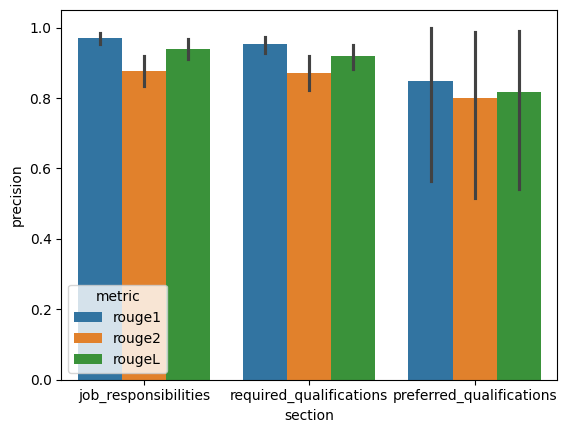

In [135]:
rs_score = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# print(' '.join(job_extracted[0]['job_responsibilities']))
# print(type(postings_sample_df.iloc[jd_ext_idx[0]]['description']))
# print(rs_score.score(postings_sample_df.iloc[jd_ext_idx[0]]['description'], ' '.join(job_extracted[0]['job_responsibilities'])))

r1_scores = {}
r2_scores = {}
rL_scores = {}

for i in range(len(jd_ext_idx)):
    original_desc = postings_sample_df.iloc[jd_ext_idx[i]]['description']
    for section in SECTIONS:
        content = concat_by_section(job_extracted[i], section)
        # content = job_extracted[i][section]
        if content:
            if section not in r1_scores:
                r1_scores[section] = {}
                r2_scores[section] = {}
                rL_scores[section] = {}
            score = rs_score.score(original_desc, content)
            r1_scores[section][i] = score['rouge1'].precision
            r2_scores[section][i] = score['rouge2'].precision
            rL_scores[section][i] = score['rougeL'].precision

# Visualize the rouge1 and rougeL by section in a grouped bar plot
r1_df =  pd.DataFrame(r1_scores)
r1_df['metric'] = 'rouge1'
r2_df =  pd.DataFrame(r2_scores)
r2_df['metric'] = 'rouge2'
rL_df =  pd.DataFrame(rL_scores)
rL_df['metric'] = 'rougeL'

score_df = pd.concat([r1_df, r2_df, rL_df])
score_df = score_df.melt(id_vars=['metric'], var_name='section', value_name='precision')
print(score_df.tail())

sns.barplot(data= score_df , x='section', y='precision',hue='metric')

In [26]:
!pip install --quiet sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer
# Download from the 🤗 Hub
model = SentenceTransformer("jensjorisdecorte/JobBERT-v2")





In [28]:
from pydantic import model_validator

from sentence_transformers import SentenceTransformer

# Download from the 🤗 Hub
model = SentenceTransformer("jensjorisdecorte/JobBERT-v2")
# Run inference
sentences = [
    'Branch Manager',
    'teamwork principles, office administration, delegate responsibilities, create banking accounts, manage alarm system, make independent operating decisions, use microsoft office, offer financial services, ensure proper document management, own management skills, use spreadsheets software, manage cash flow, integrate community outreach, manage time, perform multiple tasks at the same time, carry out calculations, assess customer credibility, maintain customer service, team building, digitise documents, promote financial products, communication, assist customers, follow procedures in the event of an alarm, office equipment',
    'support employability of people with disabilities, schedule shifts, issue licences, funding methods, maintain correspondence records, computer equipment, decide on providing funds, tend filing machine, use microsoft office, lift stacks of paper, transport office equipment, tend to guests with special needs, provide written content, foreign affairs policy development, provide charity services, philanthropy, maintain financial records, meet deadlines, manage fundraising activities, assist individuals with disabilities in community activities, report on grants, prepare compliance documents, manage grant applications, tolerate sitting for long periods, follow work schedule',
]
embeddings = model.encode(sentences)
print(embeddings.shape)
# [3, 1024]

# Get the similarity scores for the embeddings
similarities = model.similarity(embeddings, embeddings)
print(similarities)
# [3, 3]

(3, 768)
tensor([[1.0000, 0.2321, 0.0788],
        [0.2321, 1.0000, 0.2799],
        [0.0788, 0.2799, 1.0000]])
